# Educational Standardized Testing Analysis
By: Nik Piepenbreier

## Data Gathering
The data used below is licensed under Ontario's Open Data License. The Data Dictionary and other supporting information can be found here: https://www.ontario.ca/data/school-information-and-student-demographics

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_excel("https://files.ontario.ca/opendata/sif_data_table_2017_2018prelim_en_september.xlsx")

## Data Cleaning

In [3]:
#Let's explore the columns to see which data we can drop
columns = df.columns
print(columns)

Index(['Board Number', 'Board Name', 'Board Type', 'School Number',
       'School Name', 'School Type', 'School Special Condition Code',
       'School Level', 'School Language', 'Grade Range', 'Building Suite',
       'P.O. Box', 'Street', 'Municipality', 'City', 'Province', 'Postal Code',
       'Phone Number', 'Fax Number', 'School Website', 'Board Website',
       'Enrolment', 'Latitude', 'Longitude',
       'Percentage of Students Whose First Language Is Not English',
       'Percentage of Students Whose First Language Is Not French',
       'Percentage of Students Who Are New to Canada from a Non-English Speaking Country',
       'Percentage of Students Who Are New to Canada from a Non-French Speaking Country',
       'Percentage of Students Receiving Special Education Services',
       'Percentage of Students Identified as Gifted',
       'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',
       'Change in Grade 3 Reading Achievement Over Three Years

In [4]:
#We can drop some of the columns that aren't of relevance to us:
#We won't be using the columns below, so let's drop those
df = df.drop(['Building Suite', 'P.O. Box', 'Street', 'Phone Number', 'Fax Number', 'School Website', 'Board Website', 'School Name', 'Province','Extract Date'], axis = 1)
columns = df.columns
print(columns)

Index(['Board Number', 'Board Name', 'Board Type', 'School Number',
       'School Type', 'School Special Condition Code', 'School Level',
       'School Language', 'Grade Range', 'Municipality', 'City', 'Postal Code',
       'Enrolment', 'Latitude', 'Longitude',
       'Percentage of Students Whose First Language Is Not English',
       'Percentage of Students Whose First Language Is Not French',
       'Percentage of Students Who Are New to Canada from a Non-English Speaking Country',
       'Percentage of Students Who Are New to Canada from a Non-French Speaking Country',
       'Percentage of Students Receiving Special Education Services',
       'Percentage of Students Identified as Gifted',
       'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',
       'Change in Grade 3 Reading Achievement Over Three Years',
       'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',
       'Change in Grade 3 Writing Achievement Over Three 

In [5]:
#The data is currently presented in tabular, report format. For our analysis, we'll want to rely on Pandas's pivot 
#function. As a result, we'll melt the analytical variables to each respective school.

#Let's change some of the fields to make them easier to type
#We'll want to change the column names to make writing the code easier
newcolumns = [
    'boardnum',
    'boardname',
    'boardtype',
    'schoolnum',
    'schooltype',
    'condcode',
    'schoollevel',
    'language',
    'grade',
    'municipality',
    'city',
    'postal',
    'enrolment',
    'lat',
    'long',
    'noneng',
    'nonfren',
    'immnoneng',
    'immnonfren',
    'speced',
    'gifted',
    'gr3reading',
    'gr3readingchange',
    'gr3writing',
    'gr3writingchange',
    'gr3math',
    'gr3mathchange',
    'gr6reading',
    'gr6readingchange',
    'gr6writing',
    'gr6writingchange',
    'gr6math',
    'gr6mathchange',
    'gr9math',
    'gr9mathchange',
    'gr9appmath',
    'gr9appmathchange',
    'gr10osslt',
    'gr10ossltchange',
    'lowinc',
    'postsec'
]

df.columns = newcolumns
columns = df.columns
print(columns)


Index(['boardnum', 'boardname', 'boardtype', 'schoolnum', 'schooltype',
       'condcode', 'schoollevel', 'language', 'grade', 'municipality', 'city',
       'postal', 'enrolment', 'lat', 'long', 'noneng', 'nonfren', 'immnoneng',
       'immnonfren', 'speced', 'gifted', 'gr3reading', 'gr3readingchange',
       'gr3writing', 'gr3writingchange', 'gr3math', 'gr3mathchange',
       'gr6reading', 'gr6readingchange', 'gr6writing', 'gr6writingchange',
       'gr6math', 'gr6mathchange', 'gr9math', 'gr9mathchange', 'gr9appmath',
       'gr9appmathchange', 'gr10osslt', 'gr10ossltchange', 'lowinc',
       'postsec'],
      dtype='object')


## Reshaping the Data

In [6]:
#Now we'll melt the data for analysis
df = pd.melt(df, id_vars = ['boardnum', 'boardname', 'boardtype', 'schoolnum','schooltype','condcode','schoollevel','language','grade','municipality','city','postal','enrolment','lat','long','noneng','nonfren','immnoneng','immnonfren','lowinc','postsec'], value_vars=['speced','gifted','gr3reading','gr3readingchange','gr3writing','gr3writingchange','gr3math','gr3mathchange','gr6reading','gr6readingchange','gr6writing','gr6writingchange','gr6math','gr6mathchange','gr9math','gr9mathchange','gr9appmath','gr9appmathchange','gr10osslt','gr10ossltchange'])
df.head()

,boardnum,boardname,boardtype,schoolnum,schooltype,condcode,schoollevel,language,grade,municipality,...,lat,long,noneng,nonfren,immnoneng,immnonfren,lowinc,postsec,variable,value
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Public,Alternative,Secondary,English,9-12,Sault Ste. Marie,...,46.53477,-84.30772,NaN,100,NaN,NaN,22.7,20.5,speced,19.8
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),19186,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,46.50593,-84.28732,SP,100,SP,SP,11,56.3,speced,14.8
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),67679,Public,Not applicable,Elementary,English,JK-3,Bruce Mines,...,46.30183,-83.78020,NaN,100,NaN,NaN,34.3,37.2,speced,SP
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),43362,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,46.52455,-84.29804,SP,100,SP,SP,32,31.4,speced,17.5
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),54542,Public,Not applicable,Elementary,English,JK-8,Blind River,...,46.18454,-82.95760,SP,99.3,SP,SP,24.8,19.8,speced,25.6


We know from the data's documentation that some of the data is Not Available ('NA'), Not Reported (suppressed) ('N/R'), or has No Data ('N/D'). At this point, we should decide how to treat this data. We have a number of options:
- Impute the data (replace the values with the mean/median)
- Remove those cases

We'll be remove those cases here as we may otherwise skew our analysis, without knowing what factors influence education outcomes 

In [7]:
#We'll replace all missing values with the None type
df['value'] = df['value'].replace('NA', None)
df['value'] = df['value'].replace('N/R', None)
df['value'] = df['value'].replace('N/D', None)
df['value'] = df['value'].replace('%','', regex=True)

#We'll copy over a new column that changes values to numeric, changing None to NaN
df['value2'] = pd.to_numeric(df['value'], errors='coerce')
df.head()

,boardnum,boardname,boardtype,schoolnum,schooltype,condcode,schoollevel,language,grade,municipality,...,long,noneng,nonfren,immnoneng,immnonfren,lowinc,postsec,variable,value,value2
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Public,Alternative,Secondary,English,9-12,Sault Ste. Marie,...,-84.30772,NaN,100,NaN,NaN,22.7,20.5,speced,19.8,19.8
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),19186,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,-84.28732,SP,100,SP,SP,11,56.3,speced,14.8,14.8
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),67679,Public,Not applicable,Elementary,English,JK-3,Bruce Mines,...,-83.78020,NaN,100,NaN,NaN,34.3,37.2,speced,SP,NaN
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),43362,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,-84.29804,SP,100,SP,SP,32,31.4,speced,17.5,17.5
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),54542,Public,Not applicable,Elementary,English,JK-8,Blind River,...,-82.95760,SP,99.3,SP,SP,24.8,19.8,speced,25.6,25.6


In [8]:
#Let's clean the columns since we know our process worked:
df['value'] = df['value2']
df = df.drop(['value2'], axis = 1)
df.head()

,boardnum,boardname,boardtype,schoolnum,schooltype,condcode,schoollevel,language,grade,municipality,...,lat,long,noneng,nonfren,immnoneng,immnonfren,lowinc,postsec,variable,value
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Public,Alternative,Secondary,English,9-12,Sault Ste. Marie,...,46.53477,-84.30772,NaN,100,NaN,NaN,22.7,20.5,speced,19.8
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),19186,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,46.50593,-84.28732,SP,100,SP,SP,11,56.3,speced,14.8
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),67679,Public,Not applicable,Elementary,English,JK-3,Bruce Mines,...,46.30183,-83.78020,NaN,100,NaN,NaN,34.3,37.2,speced,NaN
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),43362,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,46.52455,-84.29804,SP,100,SP,SP,32,31.4,speced,17.5
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),54542,Public,Not applicable,Elementary,English,JK-8,Blind River,...,46.18454,-82.95760,SP,99.3,SP,SP,24.8,19.8,speced,25.6


In [9]:
#Let's drop all rows where the value = NaN
df = df.dropna(subset=['value'])
df.head()

,boardnum,boardname,boardtype,schoolnum,schooltype,condcode,schoollevel,language,grade,municipality,...,lat,long,noneng,nonfren,immnoneng,immnonfren,lowinc,postsec,variable,value
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Public,Alternative,Secondary,English,9-12,Sault Ste. Marie,...,46.53477,-84.30772,NaN,100,NaN,NaN,22.7,20.5,speced,19.8
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),19186,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,46.50593,-84.28732,SP,100,SP,SP,11,56.3,speced,14.8
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),43362,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,46.52455,-84.29804,SP,100,SP,SP,32,31.4,speced,17.5
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),54542,Public,Not applicable,Elementary,English,JK-8,Blind River,...,46.18454,-82.95760,SP,99.3,SP,SP,24.8,19.8,speced,25.6
5,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),490822,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,46.52447,-84.31073,SP,100,NaN,NaN,19,35.3,speced,9.9


## Adding a Geographic Column
We'll add a column that defines whether the school belongs to Halton Region, a neighbouring area, or the rest of Ontario.

In [10]:
#Let's generate a variable that identifies if a school belongs to Halton region, a neighbouring area, or the rest of Ontario
df['halton'] = df['boardname']
df['halton'] = df['halton'].map({'Halton DSB': 'Halton', 'Halton CDSB': 'Halton', 'DSB Niagara': 'Neighbouring', 'Hamilton-Wentworth CDSB': 'Neighbouring', 'Hamilton-Wentworth DSB': 'Neighbouring', 'Niagara CDSB': 'Neighbouring', "Niagara Peninsula Children's Centre SA": 'Neighbouring', 'Peel DSB': 'Neighbouring', 'Toronto CDSB': 'Neighbouring', 'Toronto DSB': 'Neighbouring', 'Waterloo CDSB': 'Neighbouring', 'Waterloo Region DSB': 'Neighbouring', 'York CDSB': 'Neighbouring', 'York Region DSB':'Neighbouring'})
df['halton'] = df['halton'].replace(np.nan, 'Rest of Ontario')

#Note: 'halton' variable - Ontario excludes Halton, Neighbouring

df['halton'].unique()

array(['Rest of Ontario', 'Neighbouring', 'Halton'], dtype=object)

## Identifying Test Type
Let's add a way to identify if the test is related to Math or Literacy.

In [11]:
df['testtype'] = df['variable']
df['testtype'] = df['testtype'].map({'gr3reading':'Literacy','gr3readingchange':'Literacy','gr3writing':'Literacy','gr3writingchange':'Literacy','gr3math':'Math','gr3mathchange':'Math','gr6reading':'Literacy','gr6readingchange':'Literacy','gr6writing':'Math','gr6writingchange':'Math','gr6math':'Math','gr6mathchange':'Math','gr9math':'Math','gr9mathchange':'Math','gr9appmath':'Math','gr9appmathchange':'Math','gr10osslt':'Literacy','gr10ossltchange':'Literacy'})
df['testtype'] = df['testtype'].replace(np.nan, 'Not a test')

df['gradelevel'] = df['variable']
df['gradelevel'] = df['gradelevel'].map({'gr3reading': 3,'gr3readingchange':3,'gr3writing':3,'gr3writingchange':3,'gr3math':3,'gr3mathchange':3,'gr6reading':6,'gr6readingchange':6,'gr6writing':6,'gr6writingchange':6,'gr6math':6,'gr6mathchange':6,'gr9math':6,'gr9mathchange':9,'gr9appmath':9,'gr9appmathchange':9,'gr10osslt':10,'gr10ossltchange':10})
df['gradelevel'] = df['gradelevel'].replace(np.nan, 'Not a test')

In [12]:
print(df['testtype'].unique())
print(df['gradelevel'].unique())

['Not a test' 'Literacy' 'Math']
['Not a test' 3.0 6.0 9.0 10.0]


## Preparing to look at Impacts of Income and Parents' Education Levels
Let's also take a look at how income and parents' education levels can impact performance in scores. For this, we'll begin by looking at the system as a whole. We can classify percentages of both variables into categories:
- 0-24% - Low
- 25-49% - Medium
- 50-74% - Medium-High
- 75-100% - High

In [13]:
#Prepare variables to change to numberic
df['lowinc'] = df['lowinc'].replace('NA', None)
df['lowinc'] = df['lowinc'].replace('SP', None)
df['postsec'] = df['postsec'].replace('NA', None)
df['postsec'] = df['postsec'].replace('SP', None)

df['lowinc'] = df['lowinc'].astype(float)
df['postsec'] = df['postsec'].astype(float)

df['postsec'].max()

97.2

In [14]:
#We'll define a function that labels the data according to the parameters we set out above.
def label(element):
    if element >= 0 and element < 25:
        return '0-24'
    elif element >=25 and element < 50:
        return '25-49'
    elif element >=50 and element < 75:
        return '50-74'
    elif element > 75:
        return '75-100'
    elif element is None:
        return 'Missing'
    
#Use Pandas' apply function to apply the labels using our new function
df['postseclabel'] = df['postsec']
df['postseclabel'] = df['postseclabel'].apply(label)
df['lowinclabel'] = df['lowinc']
df['lowinclabel'] = df['lowinclabel'].apply(label)

df.head()

,boardnum,boardname,boardtype,schoolnum,schooltype,condcode,schoollevel,language,grade,municipality,...,immnonfren,lowinc,postsec,variable,value,halton,testtype,gradelevel,postseclabel,lowinclabel
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Public,Alternative,Secondary,English,9-12,Sault Ste. Marie,...,NaN,22.7,20.5,speced,19.8,Rest of Ontario,Not a test,Not a test,0-24,0-24
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),19186,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,SP,11.0,56.3,speced,14.8,Rest of Ontario,Not a test,Not a test,50-74,0-24
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),43362,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,SP,32.0,31.4,speced,17.5,Rest of Ontario,Not a test,Not a test,25-49,25-49
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),54542,Public,Not applicable,Elementary,English,JK-8,Blind River,...,SP,24.8,19.8,speced,25.6,Rest of Ontario,Not a test,Not a test,0-24,0-24
5,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),490822,Public,Not applicable,Elementary,English,JK-8,Sault Ste. Marie,...,NaN,19.0,35.3,speced,9.9,Rest of Ontario,Not a test,Not a test,25-49,0-24


## Preparing Labels for Outputs

In [15]:
df['label'] = df['variable']
df['label'] = df['label'].map({'gr3reading': 'Gr. 03 Reading', 'gr3readingchange': 'Gr. 03 Reading Change', 'gr3writing': 'Gr. 03 Writing', 'gr3writingchange': 'Gr. 03 Writing Change', 'gr3math': 'Gr. 03 Math', 'gr3mathchange': 'Gr. 03 Math Change', 'gr6reading': 'Gr. 06 Reading', 'gr6readingchange': 'Gr. 06 Reading Cchange', 'gr6writing': 'Gr. 06 Writing', 'gr6writingchange': 'Gr. 06 Writing Change', 'gr6math': 'Gr. 06 Math ', 'gr6mathchange': 'Gr. 06 Math Change', 'gr9math': 'Gr. 09 Math ', 'gr9mathchange': 'Gr. 09 Math Change', 'gr9appmath': 'Gr. 09 Applied Math', 'gr9appmathchange': 'Gr. 09 Applied Math Change', 'gr10osslt': 'Gr. 10 OSSLT', 'gr10ossltchange': 'Gr. 10 OSSLT'})


## Analyzing Geographic Test Results

In [16]:
assessments = ['gr3reading','gr3writing','gr3math','gr6reading','gr6writing','gr6math','gr9math','gr9appmath','gr10osslt']
dfassessments = df[df['variable'].isin(assessments)]
pivot1 = pd.pivot_table(dfassessments, index=['label'], columns = ['halton'],values = 'value', fill_value=0)
pivot1

halton,Halton,Neighbouring,Rest of Ontario
label,,,
Gr. 03 Math,67.834646,61.830110,58.808125
Gr. 03 Reading,82.125000,76.025694,72.857982
Gr. 03 Writing,76.906250,74.152083,68.475024
Gr. 06 Math,55.804878,50.622588,47.069424
Gr. 06 Reading,86.685484,82.065761,80.925652
Gr. 06 Writing,86.612903,81.150822,75.678484
Gr. 09 Applied Math,53.680000,42.184426,48.047722
Gr. 09 Math,90.280000,80.769841,81.645435
Gr. 10 OSSLT,81.870968,78.490566,75.251029


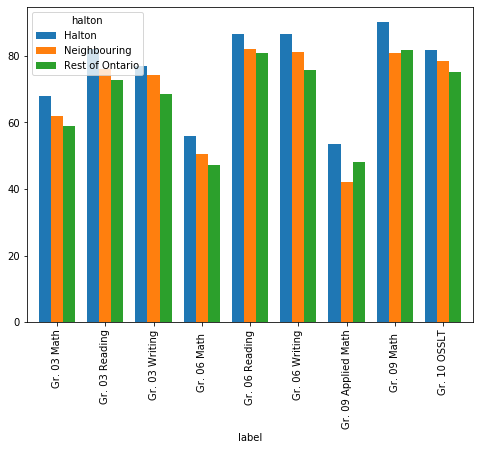

In [17]:
pivot1.plot(kind = 'bar',
        width=0.75,
        figsize=(8,5.8))

In [18]:
changes = ['gr3readingchange','gr3writingchange','gr3mathchange','gr6readingchange','gr6writingchange','gr6mathchange','gr9mathchange','gr9appmathchange','gr10ossltchange']
dfchanges = df[df['variable'].isin(changes)]
pivot2 = pd.pivot_table(dfchanges, index=['label'], columns = ['halton'],values = 'value', fill_value=0)
pivot2

halton,Halton,Neighbouring,Rest of Ontario
label,,,
Gr. 03 Math Change,-3.081301,-2.411565,-1.554526
Gr. 03 Reading Change,2.766129,2.947735,2.967973
Gr. 03 Writing Change,-2.419355,-1.510453,-2.420298
Gr. 06 Math Change,-2.945946,-1.284012,-1.614143
Gr. 06 Reading Cchange,0.982143,1.417245,1.010585
Gr. 06 Writing Change,0.392857,-0.215064,-0.820613
Gr. 09 Applied Math Change,-0.800000,-0.435146,0.217172
Gr. 09 Math Change,1.600000,-0.081967,1.530374
Gr. 10 OSSLT,-3.923077,-1.428000,-2.836645


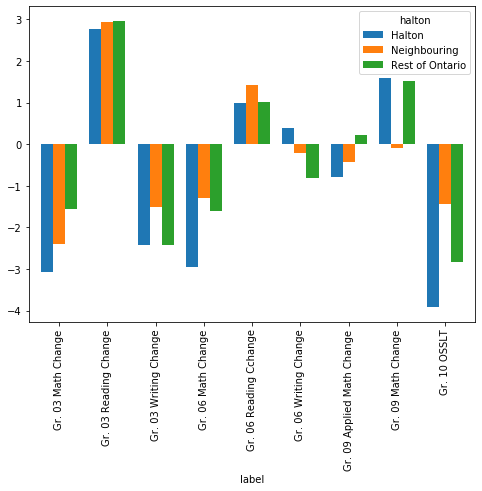

In [19]:
pivot2.plot(kind = 'bar',
        width=0.75,
        figsize=(8,5.8))

## Looking at Income and Parents's Educational Levels

In [20]:
pivot3 = pd.pivot_table(dfassessments, index='label', columns = 'postseclabel', values = 'value', fill_value=0)
pivot3

postseclabel,0-24,25-49,50-74,75-100
label,,,,
Gr. 03 Math,50.557123,58.474006,66.657224,75.677570
Gr. 03 Reading,65.387870,73.389706,79.894140,85.904762
Gr. 03 Writing,61.396333,69.787377,76.984877,83.428571
Gr. 06 Math,36.811511,46.824876,56.517375,65.482927
Gr. 06 Reading,74.202878,80.840965,86.049180,89.746341
Gr. 06 Writing,68.828777,76.881807,84.443587,89.043902
Gr. 09 Applied Math,43.629213,47.120098,47.244755,0.000000
Gr. 09 Math,75.516129,81.766827,89.096552,86.000000
Gr. 10 OSSLT,66.270408,77.778555,86.625806,94.000000


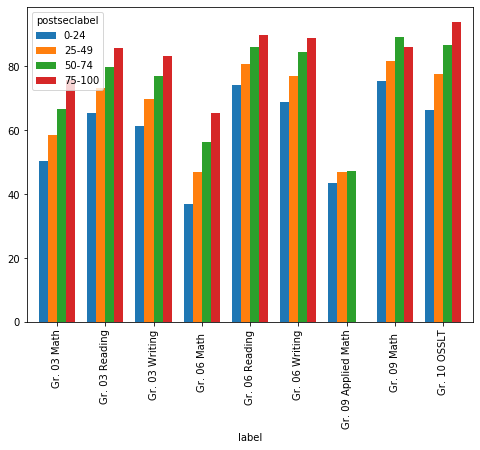

In [21]:
pivot3.plot(kind = 'bar',
        width=0.75, 
        figsize=(8,5.8), 
        )

In [22]:
pivot4 = pd.pivot_table(dfassessments, index='label', columns = 'lowinclabel', values = 'value', fill_value=0)
pivot4

lowinclabel,0-24,25-49,50-74
label,,,
Gr. 03 Math,63.389497,51.488457,39.346154
Gr. 03 Reading,76.909722,67.514007,54.730769
Gr. 03 Writing,73.334430,64.353228,56.076923
Gr. 06 Math,51.526647,40.622334,30.716981
Gr. 06 Reading,83.853866,74.977415,64.660377
Gr. 06 Writing,80.384758,71.863237,63.094340
Gr. 09 Applied Math,47.477863,35.797297,0.000000
Gr. 09 Math,82.796712,71.835443,0.000000
Gr. 10 OSSLT,77.565280,69.214286,0.000000


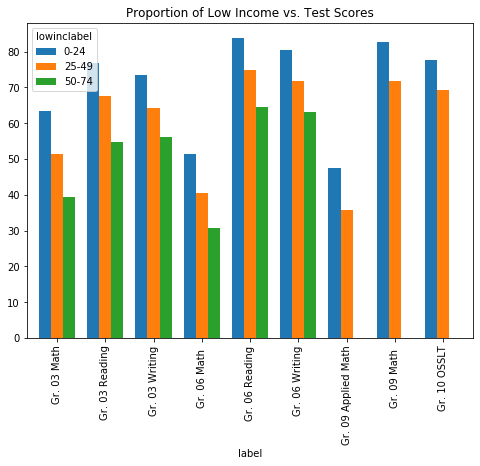

In [23]:
pivot4.plot(kind = 'bar',
        width=0.75,
        figsize=(8,5.8),
        title = 'Proportion of Low Income vs. Test Scores',
        )

## School Type and Test Achievements

In [24]:
pivot5 = pd.pivot_table(dfassessments, index=['gradelevel', 'testtype'], columns = 'schooltype', values = 'value', fill_value=0)
pivot5

schooltype            Catholic  Hospital  Protestant Separate  Provincial  \
gradelevel testtype                                                         
3.0        Literacy  76.118972      60.5                 78.0           0   
           Math      63.105845      55.0                 75.0           0   
6.0        Literacy  84.073693      78.0                 77.0           0   
           Math      68.447046      64.0                 43.5           0   
9.0        Math      49.728745       0.0                  0.0          38   
10.0       Literacy  80.984252       0.0                  0.0          33   

schooltype              Public  
gradelevel testtype             
3.0        Literacy  70.925309  
           Math      58.837447  
6.0        Literacy  80.202183  
           Math      63.467586  
9.0        Math      44.531120  
10.0       Literacy  74.586338

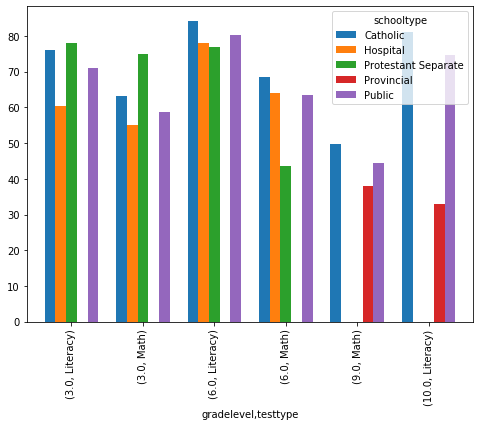

In [25]:
pivot5.plot(kind = 'bar',
        width=0.75,
        figsize=(8,5.8)
        )

## Looking at Language

In [26]:
pivot6 = pd.pivot_table(dfassessments, index=['label'], columns = 'language', values = 'value', fill_value=0)
pivot6

language,English,French
label,,
Gr. 03 Math,59.264847,72.890845
Gr. 03 Reading,73.826218,81.757042
Gr. 03 Writing,70.848166,73.267606
Gr. 06 Math,45.962149,81.989170
Gr. 06 Reading,80.739396,91.465704
Gr. 06 Writing,78.337504,76.754513
Gr. 09 Applied Math,45.345736,53.376471
Gr. 09 Math,80.987768,86.170213
Gr. 10 OSSLT,74.953421,88.600000


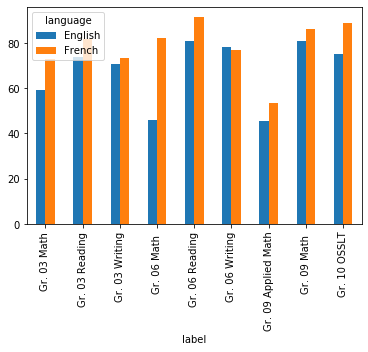

In [27]:
pivot6.plot(kind = 'bar')

From this, we can see that French schools consistently (in all but one category) performed better than English speaking counterparts. Because of how the data is collected, we can't successfully dive into why this might be (as data is referenced to postal codes and then StatsCan data).

## Exporting Key Data

In [28]:
writer = pd.ExcelWriter('analysis.xlsx', engine='xlsxwriter')

pivot1.to_excel(writer, sheet_name='Geographic')
pivot2.to_excel(writer, sheet_name='Geographic Changes')
pivot3.to_excel(writer, sheet_name='Post Secondary')
pivot4.to_excel(writer, sheet_name='Low Income')
pivot5.to_excel(writer, sheet_name='School Type')
pivot6.to_excel(writer, sheet_name='Language')

writer.save()